# RNN playground

In [1]:
# import numpy as np
# import tensorflow as tf

# N (samples) x D (features) x T (time teps)

# example stock price
# T=10 -> 10
# D = 1 -> stock price is the only feature
# N number of windows in time series
# 100 stock prices
# window = T = 10
# 100 - 10 + 1 (L - T + 1)
# D = 500 -> 500 prices of different stocks

# N x D
# N x H x W x C
# tensorflow N x D x T

# number of steps you want to predict is called horizon

In [5]:
#%pip install tensorflow
#%pip install matplotlib
#%pip install scikit-learn

In [6]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [10]:
# df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Starbucks%20satisfactory%20survey.csv')
df = pd.read_csv('https://raw.githubusercontent.com/gupta24789/Machine-Learning-Datasets/master/starbucks.csv')

In [12]:
df

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548
...,...,...,...
1001,2018-12-24,60.5600,6323252
1002,2018-12-26,63.0800,16646238
1003,2018-12-27,63.2000,11308081
1004,2018-12-28,63.3900,7712127


In [29]:
series = df['Close'].values.reshape(-1,1)
#series = series[:1000]
series

array([[38.0061],
       [37.2781],
       [36.9748],
       ...,
       [63.2   ],
       [63.39  ],
       [64.4   ]])

In [30]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [28]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D = 1
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (996, 10, 1) Y.shape (996,)


In [32]:
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss = 'mse', optimizer=Adam(learning_rate=0.1))

# train
r = model.fit( X[:-N//2], Y[:-N//2], epochs=80,
validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
16/16 [==============================] - 4s 55ms/step - loss: 0.9009 - val_loss: 1.0026
Epoch 2/80
16/16 [==============================] - 0s 15ms/step - loss: 0.7371 - val_loss: 0.8387
Epoch 3/80
16/16 [==============================] - 0s 14ms/step - loss: 0.5979 - val_loss: 0.7323
Epoch 4/80
16/16 [==============================] - 0s 14ms/step - loss: 0.4808 - val_loss: 0.6517
Epoch 5/80
16/16 [==============================] - 0s 14ms/step - loss: 0.3865 - val_loss: 0.5945
Epoch 6/80
16/16 [==============================] - 0s 14ms/step - loss: 0.3110 - val_loss: 0.5546
Epoch 7/80
16/16 [==============================] - 0s 14ms/step - loss: 0.2523 - val_loss: 0.5220
Epoch 8/80
16/16 [==============================] - 0s 15ms/step - loss: 0.2108 - val_loss: 0.4983
Epoch 9/80
16/16 [==============================] - 0s 14ms/step - loss: 0.1785 - val_loss: 0.4801
Epoch 10/80
16/16 [==============================] - 0s 14ms/step - loss: 0.1562 - val_loss: 0.4651
Epoch 11/

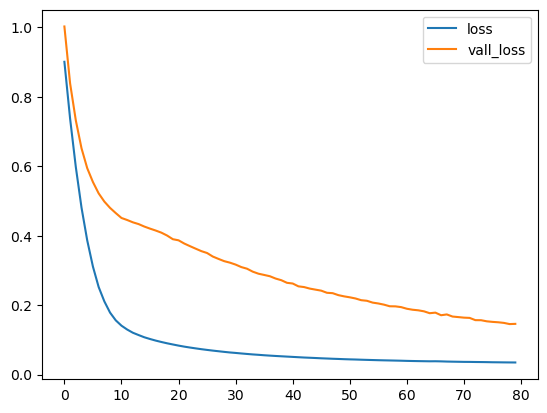

In [34]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='vall_loss')
plt.legend()